# Problem set 3 (90 pts)

## Important note: the template for your solution filename is Name_Surname_PS3.ipynb

### The correct answer to the bonus question can be used as an additional reason to increase the final grade in the border case

## Problem 1 (25 pts)

- (5 pts) Prove that $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$ if $\mathrm{vec}(X)$ is a columnwise reshape of a matrix into a long vector. What does it change if the reshape is rowwise? 

**Note:** To make a columnwise reshape in Python one should use ```np.reshape(X, order='f')```, where the string ```'f'``` stands for the Fortran ordering. 

- (2 pts) What is the complexity of a naive computation of $(A \otimes B) x$? Show how it can be reduced.

- (3 pts) Let matrices $A$ and $B$ have eigendecompositions $A = S_A\Lambda_A S_A^{-1}$ and $B = S_B\Lambda_B S^{-1}_B$. Find eigenvectors and eigenvalues of the matrix $A\otimes I + I \otimes B$, where dimension of $I$ coincides with the dimension of $A$ and $B$.


- (10 pts) Let $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Estimate analytically the number of iterations required  to solve linear system with $A$ with the relative accuracy $10^{-4}$ using
    - Richardson iteration with the optimal choice of parameter (use $2$-norm)
    - Chebyshev iteration (use $2$-norm)
    - Conjugate gradient method (use $A$-norm).
    
- (5 pts) Provide numerical confirmation of your estimate from theoretical point of view

1.1

Let $A \in \mathbb{R}^{n \times m}$, $X \in \mathbb{R}^{m \times k}$ and $B \in \mathbb{R}^{k \times l}$. 
Then we have
$$(AXB)_{ij} = \sum\limits_{q = 1}^k\sum\limits_{p=1}^m a_{ip}x_{pq}b_{qj} = \sum\limits_{p, q = 1}^{m, k}a_{ip}x_{pq}b_{qj}$$

$$\text{vec}(AXB) = \text{vec}
\begin{bmatrix} 
    \sum\limits_{p, q = 1}^{m, k}a_{1p}x_{pq}b_{q1} & \dots & \sum\limits_{p, q = 1}^{m, k}a_{1p}x_{pq}b_{ql} \\ 
    \vdots & \ddots & \vdots \\
    \sum\limits_{p, q = 1}^{m, k}a_{np}x_{pq}b_{q1} & \dots & \sum\limits_{p, q = 1}^{m, k}a_{np}x_{pq}b_{ql} \\ 
\end{bmatrix} = 
\begin{bmatrix}
    \sum\limits_{p, q = 1}^{m, k}a_{1p}x_{pq}b_{q1} \\
    \vdots \\
    \sum\limits_{p, q = 1}^{m, k}a_{np}x_{pq}b_{q1} \\
    \vdots \\ 
    \vdots \\
    \sum\limits_{p, q = 1}^{m, k}a_{1p}x_{pq}b_{ql} \\
    \vdots \\
    \sum\limits_{p, q = 1}^{m, k}a_{np}x_{pq}b_{ql}
\end{bmatrix}$$

$$(B^\top \otimes A) \text{vec}(X) = 
\begin{bmatrix}
    b_{11}a_{11} & \dots & b_{11}a_{1m} &       & b_{k1}a_{11} & \dots & b_{k1}a_{1m} \\
    \vdots       &       & \vdots       & \dots & \vdots       &       & \vdots       \\
    b_{11}a_{n1} & \dots & b_{11}a_{nm} &       & b_{k1}a_{n1} & \dots & b_{k1}a_{nm} \\
                 & \vdots &             & \ddots &             & \vdots &             \\  
    b_{1l}a_{11} & \dots & b_{1l}a_{1m} &       & b_{kl}a_{11} & \dots & b_{kl}a_{1m} \\
    \vdots       &       & \vdots       & \dots & \vdots       &       & \vdots       \\
    b_{1l}a_{n1} & \dots & b_{1l}a_{nm} &       & b_{kl}a_{n1} & \dots & b_{kl}a_{nm} \\
\end{bmatrix}
\begin{bmatrix}
    x_{11} \\
    \vdots \\
    x_{m1} \\
    \vdots \\
    \vdots \\
    x_{1k} \\
    \vdots \\
    x_{mk} \\
\end{bmatrix} = 
\begin{bmatrix}
    \sum\limits_{p=1}^{m}a_{1p}x_{p1}b_{11} + \dots + \sum\limits_{p=1}^m a_{1p}x_{pk}b_{k1} \\
    \vdots \\
    \sum\limits_{p=1}^{m}a_{np}x_{p1}b_{11} + \dots + \sum\limits_{p=1}^m a_{np}x_{pk}b_{k1} \\
    \vdots \\
    \vdots \\
    \sum\limits_{p=1}^{m}a_{1p}x_{p1}b_{1l} + \dots + \sum\limits_{p=1}^m a_{1p}x_{pk}b_{kl} \\
    \vdots \\
    \sum\limits_{p=1}^{m}a_{np}x_{p1}b_{1l} + \dots + \sum\limits_{p=1}^m a_{np}x_{pk}b_{kl} \\
\end{bmatrix} = 
\begin{bmatrix}
    \sum\limits_{p, q = 1}^{m,k}a_{1p}x_{pq}b_{q1} \\
    \vdots \\
    \sum\limits_{p, q = 1}^{m,k}a_{np}x_{pq}b_{q1} \\
    \vdots \\
    \vdots \\
    \sum\limits_{p, q = 1}^{m,k}a_{1p}x_{pq}b_{ql} \\
    \vdots \\
    \sum\limits_{p, q = 1}^{m,k}a_{np}x_{pq}b_{ql} \\
\end{bmatrix} = \text{vec}(AXB)$$

As for rowwise resgape, let us denote it as $\text{vec}'(X)$. Then we have
$$\text{vec}'(AXB) = \text{vec}\Big[(AXB)^T\Big] = \text{vec}\Big[B^TX^TA^T\Big] = 
(A \otimes B^T)\text{vec}(X^T) = (A \otimes B^T)\text{vec}'(X)$$

---

1.2

Let $A \in \mathbb{R}^{n_A\times m_A}$ and $B \in \mathbb{R}^{n_B\times m_B}$. Since any row of $A \otimes B$ has $m_A$ blocks of 
width $m_B$, we end up with $x \in \mathbb{R}^{m_A m_B}$. Hence, for naive compution we need

* $n_B m_B$ operations in order to obtain one block of $A \otimes B$
* and $n_A m_A$ operations in order to construct the whole $A \otimes B$, since it has exactly $n_A m_A$ such blocks

Futher, we need 
* $m_A m_B$ operations in order to compute one element of the resulting vector $x$
* and $n_A n_B$ operations in order to construct the whole vector $x$

This results to $2 n_A n_B m_A m_B$ operations, which is **quartic**. As I understand, the last proven equation can help us to reduce the complexity.
Let denote the inverse reshape of $x = \text{vec}(X)$ as $X = \text{unvec}(x) \in \mathbb{R}^{m_B \times m_A}$. Then we get

$$(A \otimes B)x = \text{vec}\Big[B\,\text{unvec}(x)A^\top\Big]$$

The first matrix multiplication $ C = B\,\text{unvec}(x)$ requires $n_B m_B m_A$ operations, 
while the second $CA^\top$ — $n_B m_A n_A$. Thus, we need $n_B m_A (n_A + m_B)$ operations in total, which is **cubic**

---

1.3

In order to solve this, we need to use the mixed-product (MP) property
$$(A\otimes B)(C\otimes D) \overset{\text{MP}}{=} (AC\otimes BD)$$

Let us show that
$$A\otimes I + I\otimes B = (S_A\otimes S_B)(I\otimes \Lambda_B + \Lambda_A\otimes I)(S_A^{-1}\otimes S_B^{-1})$$

So
$$(S_A\otimes S_B)(I\otimes \Lambda_B + \Lambda_A\otimes I)(S_A^{-1}\otimes S_B^{-1}) = 
\Big[(S_A\otimes S_B)(I\otimes \Lambda_B) + (S_A\otimes S_B)(\Lambda_A\otimes I)\Big](S_A^{-1}\otimes S_B^{-1}) \overset{\text{MP}}{=}$$
$$\overset{\text{MP}}{=} \Big[(S_A\otimes S_B\Lambda_B) + (S_A\Lambda_A\otimes S_B)\Big](S_A^{-1}\otimes S_B^{-1}) = 
(S_A\otimes S_B\Lambda_B)(S_A^{-1}\otimes S_B^{-1}) + (S_A\Lambda_A\otimes S_B)(S_A^{-1}\otimes S_B^{-1}) \overset{\text{MP}}{=}$$
$$\overset{\text{MP}}{=} (S_AS_A^{-1}\otimes S_B\Lambda_BS_B^{-1}) + (S_A\Lambda_AS_A^{-1}\otimes S_BS_B^{-1}) = 
(I\otimes S_B\Lambda_BS_B^{-1}) + (S_A\Lambda_AS_A^{-1}\otimes I) = A\otimes I + I\otimes B$$

We can notice that $I\otimes \Lambda_B$ is a block matrix with non-zero blocks $\Lambda_B$ only on the diagonal. 
But since these blocks are diagonal, the matrix itself is also diagonal and has elements of $\Lambda_B$ repeating along the diagonal.
The order of diagonal elements of $I\otimes \Lambda_B$ is following
$$\Big[(\Lambda_B)_1, \dots, (\Lambda_B)_n\Big], \Big[(\Lambda_B)_1, \dots, (\Lambda_B)_n\Big], \dots, 
\Big[(\Lambda_B)_1, \dots, (\Lambda_B)_n\Big]$$

Futher, $\Lambda_A \otimes I$ is also a block-diagonal matrix, since $\Lambda_A$ is diagonal and all the blocks are identity matrices 
multiplied by some eigenvalue from $\Lambda_A$, so it has the elements of $\Lambda_A$ on the diagonal.
The order of diagonal elements of $\Lambda_A \otimes I$ is following
$$\Big[(\Lambda_A)_1, \dots, (\Lambda_A)_1\Big], \Big[(\Lambda_A)_2, \dots, (\Lambda_A)_2\Big], \dots, 
\Big[(\Lambda_A)_n, \dots, (\Lambda_A)_n\Big]$$

Hence, $I \otimes \Lambda_B + \Lambda_A \otimes I$ is diagonal and contains paired sums $(\Lambda_A)_i + (\Lambda_B)_j$ of all possible 
combinations $i, j \in \{1, 2, \dots, n\}$

Moreover, since $S_A^{-1} \otimes S_B^{-1} = (S_A \otimes S_B)^{-1}$, the matrix $A \otimes I + I \otimes B$ is diagonalizable, and 
$S_A \otimes S_B$ contains its eigenvectors columnwise, while $I \otimes \Lambda_B + \Lambda_A \otimes I$ contains its eigenvalues on 
the diagonal
$$A\otimes I + I\otimes B = (S_A\otimes S_B)(I\otimes \Lambda_B + \Lambda_A\otimes I)(S_A \otimes S_B)^{-1}$$

It also can be seen that columns of $S_A\otimes S_B$ equal to $v_A \otimes v_B$, where $v_A$ and $v_B$ are eigenvectors of $A$ and $B$. 
Therefore, matrix $A\otimes I + I\otimes B$ has eigenvalues $(\Lambda_A)_i + (\Lambda_B)_j$ with corresponding eigenvectors 
$(v_A)_i \otimes (v_B)_j$

---

1.4

Let us denote the error between the true solution $x_\ast$ and its approximation $x_k$ on k'th step as $e_k = x_k - x_\ast$.
Then the relative accuracy can be expressed as follows
$$\text{acc}_k = \frac{\|x_k - x_\ast\|_2}{\|x_\ast\|_2} = \frac{\|e_k\|_2}{\|x_\ast\|_2}$$

Using the zero vector as an initial guess, we have $e_0 = -x_\ast$. Let us also notice that since matrix $A$ is diagonal, 
its eigenvalues $\lambda$ are stored along the diagonal

---

### Richardson method

We have the following inequality for error bound
$$\text{cond}(A) = \frac{\lambda_{\text{max}}}{\lambda_{\text{min}}} \Longrightarrow 
q = \frac{\text{cond}(A) - 1}{\text{cond}(A) + 1},\;\|e_k\|_2 \leqslant q^k\|e_0\|_2$$
$$\text{acc}_k = \frac{\|e_k\|_2}{\|x_\ast\|_2} \leqslant q^k \frac{\|e_0\|_2}{\|x_\ast\|_2} = 
q^k\frac{\|x_\ast\|_2}{\|x_\ast\|_2} = q^k \leqslant 10^{-4} \Longrightarrow k \geqslant \log_q 10^{-4} = \frac{\ln 10^{-4}}{\ln q}$$

---

### Chebyshev method

In a similar manner
$$\text{cond}(A) = \frac{\lambda_{\text{max}}}{\lambda_{\text{min}}} \Longrightarrow 
q = \frac{\sqrt{\text{cond}(A)} - 1}{\sqrt{\text{cond}(A)} + 1},\;\|e_k\|_2 \leqslant Cq^{k - 1}\|e_0\|_2$$

If we consider $C = 1$
$$\text{acc}_k = \frac{\|e_k\|_2}{\|x_\ast\|_2} \leqslant Cq^{k - 1} \frac{\|e_0\|_2}{\|x_\ast\|_2} = 
Cq^{k - 1} \frac{\|x_\ast\|_2}{\|x_\ast\|_2} = Cq^{k - 1} \leqslant 10^{-4} \Longrightarrow k \geqslant 1 + \log_q 10^{-4} = 
1 + \frac{\ln 10^{-4}}{\ln q}$$

---

### Conjugate gradient method

During the lecture it was shown that here we have the same bound as for Chebyshev iteration (but in $A$-norm)

$$\text{acc}_k = \frac{\|e_k\|_A}{\|x_\ast\|_A} \leqslant Cq^k \frac{\|e_0\|_A}{\|x_\ast\|_A} = 
Cq^k \frac{\|x_\ast\|_A}{\|x_\ast\|_A} = Cq^k \Longrightarrow k \geqslant \log_q 10^{-4} = \frac{\ln 10^{-4}}{\ln q}$$

In [ ]:
import numpy as np
import scipy as sp

from scipy.sparse import diags as sp_diags
from scipy.sparse.linalg import spsolve as sp_solve
from scipy.sparse import identity as sp_identity

import matplotlib.pyplot as plt

In [ ]:
d = np.append(np.arange(1, 1001, 1) / 1000, 1000)
A = np.diag(d)
f = np.ones(A.shape[0])
x_true = f / d

lambda_max, lambda_min = 1000, 1/1000
cond = lambda_max / lambda_min

### Richardson method

In [ ]:
q = (cond - 1) / (cond + 1)
k = int(np.ceil(np.log(1e-4) / np.log(q)))
print('theoretical lower bound for the necessary number of iterations:', k)

theoretical lower bound for the necessary number of iterations: 4605171


In [ ]:
def richardson_iteration(A, f, lambda_max, lambda_min, x_true, max_iter=int(1e7), eps=1e-4):
    tau_optimal = 2 / (lambda_max + lambda_min)
    relative_accuracy_history = []

    x_true_norm = np.linalg.norm(x_true, ord=2)
    x = np.zeros_like(x_true)
    
    for i in range(max_iter):
        residual = A.dot(x) - f
        x = x - tau_optimal * residual

        error_norm = np.linalg.norm(x - x_true, ord=2)
        relative_accuracy_history.append(error_norm / x_true_norm)

        if i % 10000 == 0:
            print(f'iteration: {i}, relative accuracy: {relative_accuracy_history[-1]:.5f}\n')

        if relative_accuracy_history[-1] < eps:
            break

    return relative_accuracy_history

In [ ]:
richardson_accuracy_history = richardson_iteration(A, f, lambda_max, lambda_min, x_true)

iteration: 0, relative accuracy: 0.99999

iteration: 10000, relative accuracy: 0.94747

iteration: 20000, relative accuracy: 0.90998

iteration: 30000, relative accuracy: 0.87787

iteration: 40000, relative accuracy: 0.84915

iteration: 50000, relative accuracy: 0.82288

iteration: 60000, relative accuracy: 0.79851

iteration: 70000, relative accuracy: 0.77571

iteration: 80000, relative accuracy: 0.75423

iteration: 90000, relative accuracy: 0.73388

iteration: 100000, relative accuracy: 0.71452

iteration: 110000, relative accuracy: 0.69606

iteration: 120000, relative accuracy: 0.67839

iteration: 130000, relative accuracy: 0.66145

iteration: 140000, relative accuracy: 0.64516

iteration: 150000, relative accuracy: 0.62949

iteration: 160000, relative accuracy: 0.61439

iteration: 170000, relative accuracy: 0.59981

iteration: 180000, relative accuracy: 0.58572

iteration: 190000, relative accuracy: 0.57209

iteration: 200000, relative accuracy: 0.55889

iteration: 210000, relative

The is slightly faster than the theoretical lower bound

In [ ]:
len(richardson_accuracy_history)

4480898

### Chebyshev method

In [ ]:
q = (np.sqrt(cond) - 1) / (np.sqrt(cond) + 1)
k = 1 + int(np.ceil(np.log(1e-4) / np.log(q)))
print('theoretical lower bound for the necessary number of iterations:', k)

theoretical lower bound for the necessary number of iterations: 4607


In [ ]:
def permute_chebyshev_roots(n_iter):
    if n_iter == 1:
        return np.array([0,], dtype=int)
    else:
        prev = permute_chebyshev_roots(n_iter // 2)
        result = np.zeros(n_iter, dtype=int)

        result[::2] = prev
        result[1::2] = n_iter - 1 - prev

        return result

def chebyshev_iteration(A, f, lambda_max, lambda_min, x_true, max_iter=2**18, eps=1e-4):
    roots = np.array([np.cos((np.pi * (2 * i + 1)) / (2 * max_iter)) for i in range(max_iter)])
    taus_optimal = 1 / np.array([(lambda_max + lambda_min - (lambda_min - lambda_max) * root) / 2 for root in roots])
    
    permutation = permute_chebyshev_roots(max_iter)
    relative_accuracy_history = []

    x_true_norm = np.linalg.norm(x_true, ord=2)
    x = np.zeros_like(x_true)
    
    for i in range(max_iter):
        residual = A.dot(x) - f
        x = x - taus_optimal[permutation[i]] * residual
        
        error_norm = np.linalg.norm(x - x_true, ord=2)
        relative_accuracy_history.append(error_norm / x_true_norm)

        if i % 1000 == 0:
            print(f'iteration: {i}, relative accuracy: {relative_accuracy_history[-1]:.5f}\n')

        if relative_accuracy_history[-1] < eps:
            break

    return relative_accuracy_history

In [ ]:
chebyshev_accuracy_history = chebyshev_iteration(A, f, lambda_max, lambda_min, x_true)

iteration: 0, relative accuracy: 1.00000

iteration: 1000, relative accuracy: 0.32230

iteration: 2000, relative accuracy: 0.03114

iteration: 3000, relative accuracy: 0.00697

iteration: 4000, relative accuracy: 0.00097

iteration: 5000, relative accuracy: 0.00023



The convergence is naturally slower than the theoretical lower bound

In [ ]:
len(chebyshev_accuracy_history)

5561

### Conjugate gradient method

In [ ]:
q = (np.sqrt(cond) - 1) / (np.sqrt(cond) + 1)
k = int(np.ceil(np.log(1e-4) / np.log(q)))
print('theoretical lower bound for the necessary number of iterations:', k)

theoretical lower bound for the necessary number of iterations: 4606


In [ ]:
def calculate_A_norm(x, A):
    return np.sqrt(np.dot(A @ x, x))

def conjugate_gradient_iteration(A, f, x_true, max_iter=5000, eps=1e-4):
    relative_accuracy_history = []

    x_true_norm = calculate_A_norm(x_true, A)
    x = np.zeros_like(x_true)
    
    p = r = f.copy()
    
    for i in range(max_iter):

        # prepare alphas
        prev_dot_r = np.dot(r, r)
        alpha = prev_dot_r / np.dot(A @ p, p)
        
        # perform step for x and r
        x = x + alpha * p
        r = r - alpha *  A @ p
        
        # prepare betas
        cur_dot_r = np.dot(r, r)
        beta = cur_dot_r / prev_dot_r

        # perform step for p
        p = r + beta * p
        
        error_norm = calculate_A_norm(x - x_true, A)
        relative_accuracy_history.append(error_norm / x_true_norm)
        
        # if i % 1000 == 0:
        #     print(f'iteration: {i}, relative accuracy: {relative_accuracy_history[-1]:.5f}\n')

        if relative_accuracy_history[-1] < eps:
            break
            
    return relative_accuracy_history

In [ ]:
conjugate_gradient_accuracy_history = conjugate_gradient_iteration(A, f, x_true)

The convergence is much faster than the theoretical lower bound (maybe because the constant $C$ is not taken into account)

In [ ]:
len(conjugate_gradient_accuracy_history)

144

### Comparison

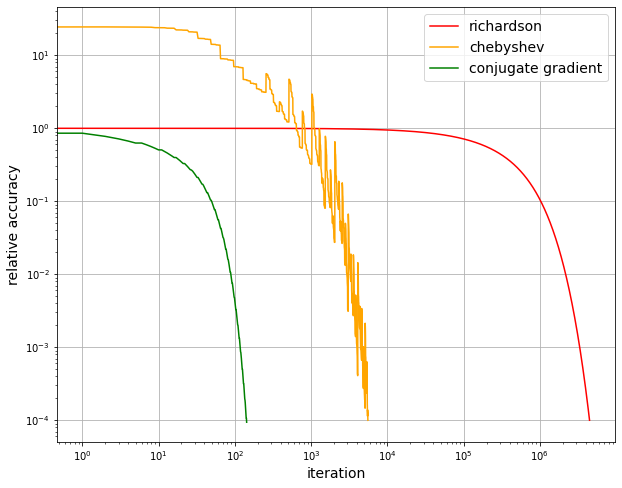

In [ ]:
plt.figure(figsize=(10, 8))

plt.plot(richardson_accuracy_history, label='richardson', color='red')
plt.plot(chebyshev_accuracy_history, label='chebyshev', color='orange')
plt.plot(conjugate_gradient_accuracy_history, label='conjugate gradient', color='green')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('iteration', fontsize=14)
plt.ylabel('relative accuracy', fontsize=14)

plt.legend(fontsize=14)
plt.grid()
plt.show()

As can be seen, conjugate gradient method is remarkably faster

## Problem 2 (65 pts)
### On the performance of conjugate gradient method for BTTB matrices.

You are given 2D image (QR-code) and convolution operator $T$. The application of $T$ results in smoothing of the image. In exact arithmetic, the proposed $T$ is non-singular. However, it becomes rather ill-conditioned with increasing $N$ in finite precision arithmetic. In this task you need to study how the conjugate gradient method performs in this case.

The original passcode is given below:

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import numpy as np
import scipy as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

from timeit import default_timer as timer
from tqdm import tqdm

In [3]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Numerical Linear Algebra/homework-3'

/content/gdrive/MyDrive/Colab Notebooks/Numerical Linear Algebra/homework-3


In [4]:
x = plt.imread('qrcode.gif')[:, :, 0]

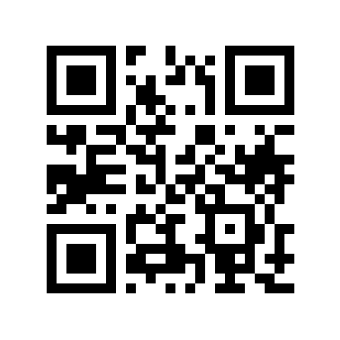

In [5]:
plt.figure(figsize=(6, 6))
plt.imshow(x, cmap='gray')

plt.axis('off')
plt.show()

In [6]:
x.shape

(330, 330)

Blurring can be performed by convolving $n\times n$ QR-code with the following filter:

$$t_{i_1j_1,i_2j_2} = T_{i_1-j_1,i_2-j_2} = \frac{\alpha}{\pi}\exp\Big[-\alpha\big[(i_1-j_1)^2 + (i_2-j_2)^2\big]\Big], \quad i_1,j_1,i_2,j_2 = 1 \ldots n, \quad 1 > \alpha > 0.$$

You know from lectures that this convolution can be viewed as a matrix-vector multiplication of some BTTB matrix $T$ of size $n^2 \times n^2$.

## Task 1 (15 pts) 

- Write function `T_matvec()` that performs multiplication of $T$ by a given vector $x$ efficiently. Remember about FFT.
- Use `scipy.sparse.linalg.LinearOperator` to create an object that has attribute `.dot()` (this object will be further used in the iterative process). Note that `.dot()` input and output must be 1D vectors, so do not forget to use reshape.

In [7]:
def construct_circulant_matrix(n, alpha):
    indices = np.array(list(range(n)) + list(range(-n + 1, 0)))

    # circulant_matrix = np.zeros((len(indices), len(indices)))
    # for i in range(len(indices)):
    #     for j in range(len(indices)):
    #         circulant_matrix[i, j] = alpha / np.pi * np.exp(-alpha * (indices[i] ** 2 + indices[j] ** 2))

    circulant_factor = np.exp(-alpha * indices ** 2)
    circulant_matrix = alpha / np.pi * np.outer(circulant_factor, circulant_factor)
    
    return circulant_matrix

def construct_matrix(x):
    n = x.shape[0]
    matrix = np.pad(x, (0, n - 1))
    return matrix

def T_matvec(x, alpha):
    n = int(np.sqrt(x.shape[0]))
    x = x.reshape(n, n)

    circulant_matrix = construct_circulant_matrix(n, alpha)
    matrix = construct_matrix(x)

    y = np.fft.ifft2(np.fft.fft2(circulant_matrix) * np.fft.fft2(matrix))
    return y[:n, :n].real.reshape(-1)

def custom_convolve_2d(x, alpha):
    n = x.shape[0]

    T = spla.LinearOperator((n ** 2, n ** 2), matvec=lambda x: T_matvec(x, alpha))
    x_convolved = T(x.reshape(-1)).reshape(n, n)

    return x_convolved, T

In [8]:
alpha = 0.01
x_convolved, T = custom_convolve_2d(x, alpha)

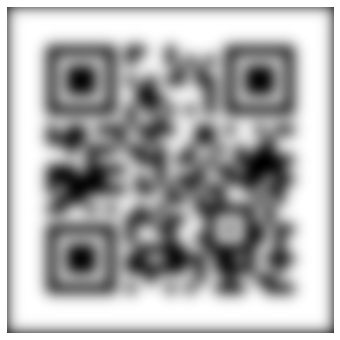

In [9]:
plt.figure(figsize=(6, 6))
plt.imshow(x_convolved, cmap='gray')

plt.axis('off')
plt.show()

**Remark.** The obtained matrix $T$ is positive definite (at least in the exact arithmetic), hence the conjugate gradient method can be applied to solve with $T$.

**Bonus question: Prove the remark above.**

## Task 2 (10 pts) 
- For $\alpha \in \{ 0.1, 0.01,0.001\}$ compute $y=Tx$ and deconvolve $x$ using `scipy.sparse.linalg.cg` with $tol \in \{10^{-3}, 10^{-4}, 10^{-5}, 10^{-6}, 10^{-7}\}$. For each pair $\alpha$, $tol$ write out `num_iters` and relative error $e = \frac{\|x - x^*\|_2}{\|x\|_2}$ .
- Comment on the results: 

    1) why the relative error does not converge to zero? 
    
    2) why the relative error converges to different values for different $\alpha$?

In [10]:
colors = ['red', 'green', 'blue']

In [11]:
alphas = np.logspace(-1, -3, base=10, num=3)
tols = tols = np.logspace(-3, -5, base=10, num=3)

In [12]:
def track_convergence(x_cur):        
    relative_accuracy = np.linalg.norm(x_cur - x.reshape(-1), ord=2) / np.linalg.norm(x.reshape(-1), ord=2)
    tolerance = np.linalg.norm(T.dot(x_cur) - x_convolved.reshape(-1), ord=2) / np.linalg.norm(x_convolved.reshape(-1), ord=2)

    relative_accuracy_history.append(relative_accuracy)
    tolerance_history.append(tolerance)

In [13]:
relative_accuracy_track = []
tolerance_track = []

T_track = []

for alpha in alphas:
    print(f'alpha = {alpha:.0e}')

    start = timer()
    relative_accuracy_history = []
    tolerance_history = []

    x_convolved, T = custom_convolve_2d(x, alpha)
    x_init = np.zeros_like(x_convolved)

    x_deconvolved = spla.cg(T, x_convolved.reshape(-1), x_init.reshape(-1), tol=tols[-1], callback=track_convergence, atol=0.)[0].real
    end = timer()

    relative_accuracy_track.append(relative_accuracy_history)
    tolerance_track.append(tolerance_history)
    T_track.append(T)

    print(f'number of iterations: {len(tolerance_history)}, time elapsed: {int(end - start)} sec\n')

alpha = 1e-01
number of iterations: 136, time elapsed: 55 sec

alpha = 1e-02
number of iterations: 168, time elapsed: 73 sec

alpha = 1e-03
number of iterations: 171, time elapsed: 67 sec



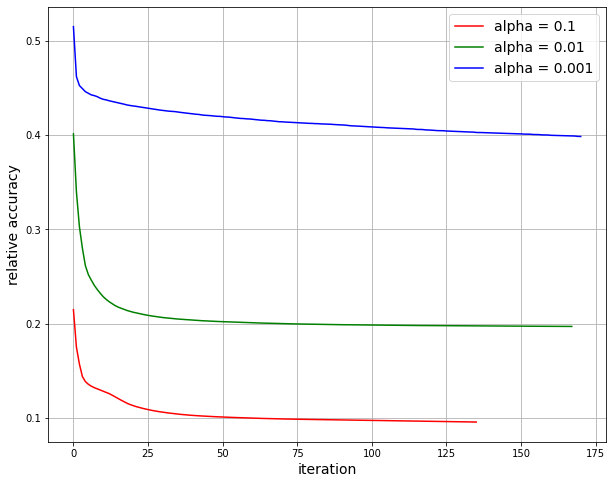

In [14]:
plt.figure(figsize=(10, 8))

for i in range(len(alphas)):
    plt.plot(relative_accuracy_track[i], label=f'alpha = {alphas[i]}', color=colors[i])

plt.legend(fontsize=14)
plt.xlabel('iteration', fontsize=14)
plt.ylabel('relative accuracy', fontsize=14)

plt.grid()
plt.show()

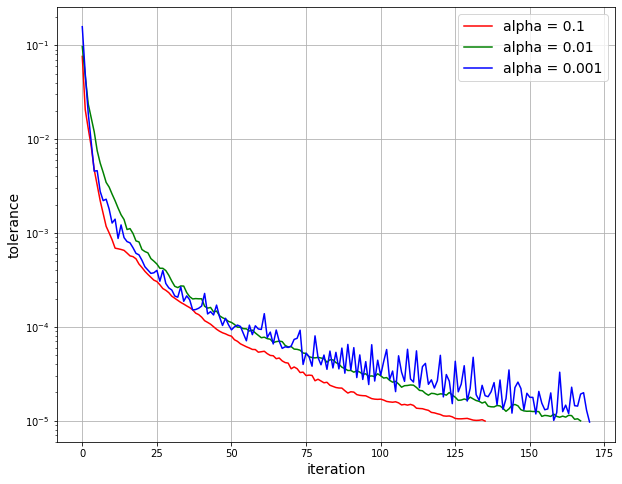

In [15]:
plt.figure(figsize=(10, 8))

for i in range(len(alphas)):
    plt.plot(tolerance_track[i], label=f'alpha = {alphas[i]}', color=colors[i])

plt.legend(fontsize=14)
plt.xlabel('iteration', fontsize=14)
plt.ylabel('tolerance', fontsize=14)

plt.yscale('log')
plt.grid()
plt.show()

In [16]:
# for alpha in alphas:
#     print(f'alpha = {alpha:.0e}')

#     for tol in tols:
#         start = timer()
#         n_iter = 0

#         def count_iterations(x):
#             global n_iter
#             n_iter += 1

#         x_convolved, T = custom_convolve_2d(x, alpha)
#         x_init = np.zeros_like(x_convolved)
#         x_deconvolved = spla.cg(T, x_convolved.reshape(-1), x_init.reshape(-1), tol, callback=count_iterations)[0]

#         relative_accuracy = np.linalg.norm(x_deconvolved - x.reshape(-1), ord=2) / np.linalg.norm(x.reshape(-1), ord=2)

#         end = timer()
#         print(f'relative accuracy for tolerance {tol:.0e}: {relative_accuracy:.4f}')
#         print(f'number of iterations: {n_iter}, time elapsed: {int(end - start)} sec\n')

In [19]:
n = x.shape[0]

for alpha in alphas:
    circulant_matrix = construct_circulant_matrix(n, alpha)
    approximate_rank = np.linalg.matrix_rank(circulant_matrix, tol=1e-16)
    print(f'circulant matrix for alpha = {alpha:.0e} has approximate rank = {approximate_rank}')

circulant matrix for alpha = 1e-01 has approximate rank = 1
circulant matrix for alpha = 1e-02 has approximate rank = 1
circulant matrix for alpha = 1e-03 has approximate rank = 1


The relative accuracy does not converge to zero because the BTTB matrix has exponentially decreasing values of kernel with 
respect to $k = i_1 - j_1$ and $m = i_2 - j_2$, which probably start to occur too frequently

$$T_{k, m} = \frac{\alpha}{\pi}\exp\Big[-\alpha\big[k^2 + m^2\big]\Big] \Longrightarrow 
T_\ell = O\Big[\exp\big[-\alpha \ell^2\big]\Big]$$

Consequently, it becomes ill-conditioned, so we observe the following
$$\text{cond}(T) = \frac{\lambda_{\text{max}}}{\lambda_{\text{min}}} \to \infty \Longrightarrow 
q = \frac{\sqrt{\text{cond}(A)} - 1}{\sqrt{\text{cond}(A)} + 1} \to 1,\;\text{acc}_k = Cq^k \to C \neq 0$$

---

As I understand, the relative accuracy also depends on $\alpha$ (given some fixed tolerance) because smaller values of these parameter 
imply more distortion of the original picture which is basically harder to reconstruct

In all further tasks fix $\alpha = 0.01$. Compute $y = Tx$, and add vector with Gaussian noise from $\mathcal{N}(0, 1)$ to $y$ and get the final right-hand side $\hat{y}$.

## Task 3 (10 pts)
- Try to deconvolve $\hat{y}$ with matrix $T$ using $tol=10^{-5}$ in CG. Explain, why CG does not converge.
- Suggest how CG can still be used to recover $x$. What are drawbacks of the suggested approach?

In [72]:
alpha = 0.01
x_convolved, T = custom_convolve_2d(x, alpha)
x_noised = x_convolved + np.random.randn(*x_convolved.shape)

In [33]:
%%time
x_init = np.zeros_like(x_noised)
n_iter = int(1e3)
x_deconvolved = spla.cg(T, x_noised.reshape(-1), x_init.reshape(-1), tol=1e-5, maxiter=n_iter)[0].real

CPU times: user 3min 54s, sys: 1min 46s, total: 5min 41s
Wall time: 3min 40s


In [34]:
relative_accuracy = np.linalg.norm(x_deconvolved - x.reshape(-1), ord=2) / np.linalg.norm(x.reshape(-1), ord=2)
print(f'relative accuracy for alpha {alpha:.0e} with max number of iterations {n_iter:.0e}: {relative_accuracy:.4f}')

relative accuracy for alpha 1e-02 with max number of iterations 1e+03: 1448345.3923


According to the results of previous task, CG does not converge because it is rather ill-conditioned. Moreover, some random noise 
in the right hand part of linear equation can move it futher from the available space $\text{Im}\,T$, which makes it even more problematic 
to reconstruct the original picture $x$

However, we could add diagonal perturbation into $T$ and obtain $T_{\lambda} = T + \lambda I$, which makes convergence faster. 
The problem with such approach is that the convolution operation is not precise, but rather shifted to the identity

## Task 4 (10 pts)

- Implement Tikhonov regularization, i.e. deconvolve $\hat{y}$ with the perturbed matrix $T_{\lambda} = T + \lambda^2I$ instead of $T$. Modify `T_matvec()` according to the template below.
- Perform computations for all $\lambda \in \{10, 1, 0.1\}$ and $tol \in \{10^{-3}, 10^{-4}, 10^{-5},10^{-6}, 10^{-7} \}$. For each pair $(\lambda, tol)$ write out `num_iters` and relative error $\displaystyle e = \frac{\|x - x^*\|_2}{\|x\|_2}$. Comment on the results: 
    - Compare robustness of the convergence with task 2. What the observed results indicate?

In [24]:
alpha = 0.01
x_convolved, T = custom_convolve_2d(x, alpha)
x_noised = x_convolved + np.random.randn(*x_convolved.shape)

In [25]:
def construct_perturbated_circulant_matrix(n, alpha, lambda_perturbation):
    indices = np.array(list(range(n)) + list(range(-n + 1, 0)))

    circulant_factor = np.exp(-alpha * indices ** 2)
    circulant_matrix = alpha / np.pi * np.outer(circulant_factor, circulant_factor)

    circulant_matrix[0, 0] += lambda_perturbation ** 2
    return circulant_matrix

def construct_matrix(x):
    n = x.shape[0]
    matrix = np.pad(x, (0, n - 1))
    return matrix

def T_lambda_matvec(x, alpha, lambda_perturbation):
    n = int(np.sqrt(x.shape[0]))
    x = x.reshape(n, n)

    perturbated_circulant_matrix = construct_perturbated_circulant_matrix(n, alpha, lambda_perturbation)
    matrix = construct_matrix(x)
    y = np.fft.ifft2(np.fft.fft2(perturbated_circulant_matrix) * np.fft.fft2(matrix))
    return y[:n, :n].real.reshape(-1)

def custom_perturbated_convolve_2d(x, alpha, lambda_perturbation):
    n = x.shape[0]

    T_perturbated = spla.LinearOperator((n ** 2, n ** 2), matvec=lambda x: T_lambda_matvec(x, alpha, lambda_perturbation))
    x_convolved = T_perturbated(x.reshape(-1)).reshape(n, n)

    return x_convolved, T_perturbated

In [26]:
lambda_perturbations = np.logspace(1, -1, base=10, num=3)
tols = np.logspace(-3, -7, base=10, num=5)

In [27]:
def track_convergence(x_cur):        
    relative_accuracy = np.linalg.norm(x_cur - x.reshape(-1), ord=2) / np.linalg.norm(x.reshape(-1), ord=2)
    tolerance = np.linalg.norm(T_perturbated.dot(x_cur) - x_noised.reshape(-1), ord=2) / np.linalg.norm(x_noised.reshape(-1), ord=2)

    relative_accuracy_history.append(relative_accuracy)
    tolerance_history.append(tolerance)

In [28]:
relative_accuracy_track = []
tolerance_track = []

x_deconvolved_track = []

for lambda_perturbation in lambda_perturbations:
    print(f'lambda perturbation = {lambda_perturbation:.0e}')

    start = timer()
    relative_accuracy_history = []
    tolerance_history = []
    
    # x_convolved, T_perturbated = custom_perturbated_convolve_2d(x, alpha, lambda_perturbation)
    # x_noised = x_convolved + np.random.randn(*x_convolved.shape)

    T_perturbated = spla.LinearOperator((n ** 2, n ** 2), matvec=lambda x: T_lambda_matvec(x, alpha, lambda_perturbation))
    x_init = np.zeros_like(x_noised)

    x_deconvolved = spla.cg(T_perturbated, x_noised.reshape(-1), x_init.reshape(-1), tol=tols[-1], callback=track_convergence, atol=0.)[0].real
    end = timer()

    relative_accuracy_track.append(relative_accuracy_history)
    tolerance_track.append(tolerance_history)

    x_deconvolved_track.append(x_deconvolved)

    print(f'number of iterations: {len(tolerance_history)}, time elapsed: {int(end - start)} sec\n')

lambda perturbation = 1e+01
number of iterations: 3, time elapsed: 1 sec

lambda perturbation = 1e+00
number of iterations: 9, time elapsed: 4 sec

lambda perturbation = 1e-01
number of iterations: 61, time elapsed: 27 sec



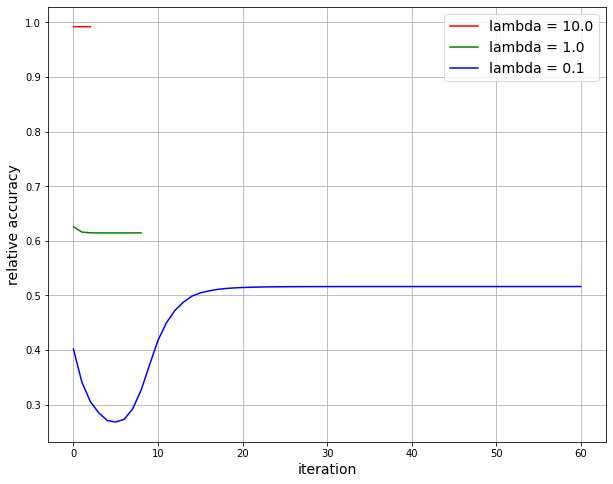

In [29]:
plt.figure(figsize=(10, 8))

for i in range(len(lambda_perturbations)):
    plt.plot(relative_accuracy_track[i], label=f'lambda = {lambda_perturbations[i]}', color=colors[i])

plt.legend(fontsize=14)
plt.xlabel('iteration', fontsize=14)
plt.ylabel('relative accuracy', fontsize=14)

# plt.yscale('log')
plt.grid()
plt.show()

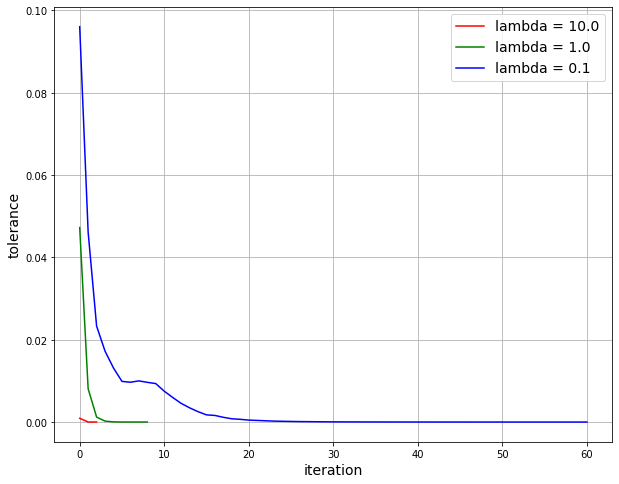

In [30]:
plt.figure(figsize=(10, 8))

for i in range(len(lambda_perturbations)):
    plt.plot(tolerance_track[i], label=f'lambda = {lambda_perturbations[i]}', color=colors[i])

plt.legend(fontsize=14)
plt.xlabel('iteration', fontsize=14)
plt.ylabel('tolerance', fontsize=14)

# plt.yscale('log')
plt.grid()
plt.show()

* noised convolved image (right part)

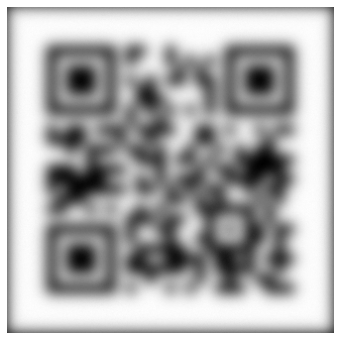

In [31]:
plt.figure(figsize=(6, 6))
plt.imshow(x_noised, cmap='gray')

plt.axis('off')
plt.show()

* deconvolved images (found solutions)

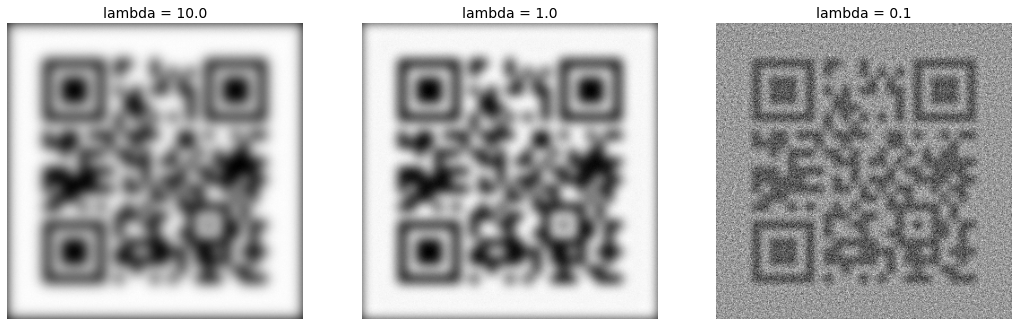

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(len(lambda_perturbations)):
    axes[i].imshow(x_deconvolved_track[i].reshape(*x_noised.shape), cmap='gray')
    axes[i].set_title(f'lambda = {lambda_perturbations[i]}', fontsize=14)
    axes[i].axis('off')

plt.show()

The convergence with perturbated matrix $T_{\lambda}$ appears to be remarkably faster, and the greater is the value $\lambda$, the fewer steps are 
needed for convergence in terms of tolerance. Moreover, there is naturally big relative error because the rigth-hand side is noised and 
thus very different from the original convolved picture

In [107]:
# for lambda_perturbation in lambda_perturbations:
#     print(f'lambda perturbation = {lambda_perturbation:.0e}')

#     for tol in tols:
#         start = timer()
#         n_iter = 0

#         def count_iterations(x):
#             global n_iter
#             n_iter += 1

#         x_convolved, T_perturbated = custom_perturbated_convolve_2d(x, alpha, lambda_perturbation)
#         x_init = np.zeros_like(x_convolved)
#         x_deconvolved = spla.cg(T_perturbated, x_convolved.reshape(-1), x_init.reshape(-1), tol, callback=count_iterations)[0]

#         relative_accuracy = np.linalg.norm(x_deconvolved - x.reshape(-1), ord=2) / np.linalg.norm(x.reshape(-1), ord=2)

#         end = timer()
#         print(f'relative accuracy for tolerance {tol:.0e}: {relative_accuracy:.4f}')
#         print(f'number of iterations: {n_iter}, time elapsed: {int(end - start)} sec\n')

## Task 5 (20 pts)

- Implement BCCB preconditioner for $T_{\lambda}$ based on Strang preconditioner for Toeplitz matrix (hint: build circulants using first columns of Toeplitz matrices on both levels). You know from lectures that circulants can be explicitly inverted using convolution theorem. Implement the corresponding matvec according to the template provided below.
- Check speedup in iterations and runtime that can be gained from the preconditioning for $\alpha = 0.01$, $\lambda = 1$ compared with Task 4. Explain results.

Here I used the following paper
http://people.maths.ox.ac.uk/wathen/preconditioning.pdf

In [34]:
def C_inv_matvec(x, alpha, lambda_perturbation):
    n = int(np.sqrt(x.shape[0]))
    x = x.reshape(n, n)
    
    # the purpose of Strang preconditioner is to approximate the inverse of T
    # earlier it was mentioned that T has exponentially small values far from the main diagonal
    # hence such entries can be replaced with values from more central diagonals
    indices = np.array(list(range(n // 2)) + list(range(-(n - 1) // 2, 0)))

    strang_factor = np.exp(-alpha * indices ** 2)
    strang_matrix = alpha / np.pi * np.outer(strang_factor, strang_factor)
    
    strang_matrix[0, 0] += lambda_perturbation ** 2

    # now we can use the fact that multiply circulant matrices in the original space
    # is the same as multiply their first columns coordinate-wise in the Fourier space
    y = np.fft.ifft2(np.fft.fft2(x) / np.fft.fft2(strang_matrix)).real
    
    return y.reshape(-1)

In [35]:
def track_convergence(x_cur):        
    relative_accuracy = np.linalg.norm(x_cur - x.reshape(-1), ord=2) / np.linalg.norm(x.reshape(-1), ord=2)
    tolerance = np.linalg.norm(T_perturbated.dot(x_cur) - x_noised.reshape(-1), ord=2) / np.linalg.norm(x_noised.reshape(-1), ord=2)

    preconditioned_relative_accuracy_history.append(relative_accuracy)
    preconditioned_tolerance_history.append(tolerance)

In [36]:
preconditioned_relative_accuracy_track = []
preconditioned_tolerance_track = []

x_deconvolved_track = []

for lambda_perturbation in lambda_perturbations:
    print(f'lambda perturbation = {lambda_perturbation:.0e}')

    start = timer()
    preconditioned_relative_accuracy_history = []
    preconditioned_tolerance_history = []
    
    T_perturbated = spla.LinearOperator((n ** 2, n ** 2), matvec=lambda x: T_lambda_matvec(x, alpha, lambda_perturbation))
    C_inv = spla.LinearOperator((n ** 2, n ** 2), matvec=lambda x: C_inv_matvec(x, alpha, lambda_perturbation))
    x_init = np.zeros_like(x_noised)

    x_deconvolved = spla.cg(T_perturbated, x_noised.reshape(-1), x_init.reshape(-1), tol=tols[-1], 
                            M=C_inv, callback=track_convergence, atol=0.)[0].real
    end = timer()

    preconditioned_relative_accuracy_track.append(preconditioned_relative_accuracy_history)
    preconditioned_tolerance_track.append(preconditioned_tolerance_history)

    x_deconvolved_track.append(x_deconvolved)

    print(f'number of iterations: {len(preconditioned_tolerance_history)}, time elapsed: {int(end - start)} sec\n')

lambda perturbation = 1e+01
number of iterations: 3, time elapsed: 1 sec

lambda perturbation = 1e+00
number of iterations: 6, time elapsed: 3 sec

lambda perturbation = 1e-01
number of iterations: 30, time elapsed: 14 sec



Here I provide comparison for $\lambda = 0.01$, because it represents more significant difference

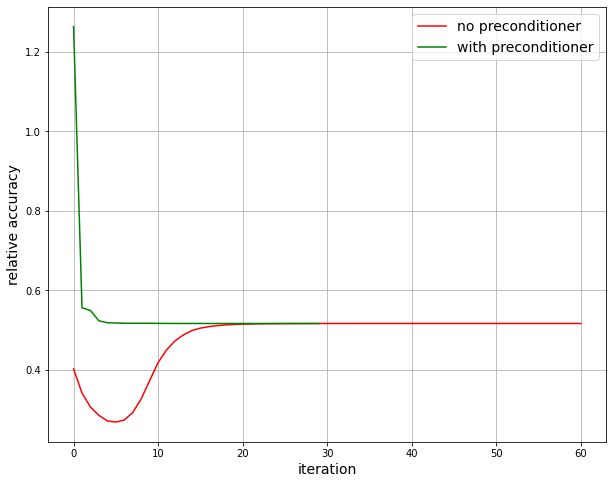

In [40]:
plt.figure(figsize=(10, 8))

plt.plot(relative_accuracy_track[-1], label='no preconditioner', color='red')
plt.plot(preconditioned_relative_accuracy_track[-1], label='with preconditioner', color='green')

plt.legend(fontsize=14)
plt.xlabel('iteration', fontsize=14)
plt.ylabel('relative accuracy', fontsize=14)

# plt.yscale('log')
plt.grid()
plt.show()

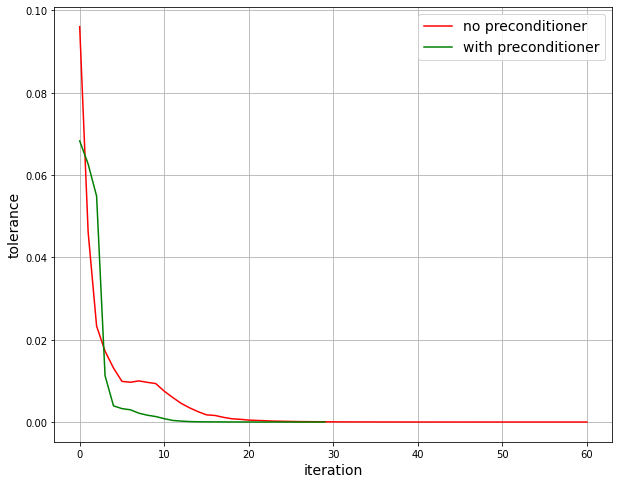

In [41]:
plt.figure(figsize=(10, 8))

plt.plot(tolerance_track[-1], label='no preconditioner', color='red')
plt.plot(preconditioned_tolerance_track[-1], label='with preconditioner', color='green')

plt.legend(fontsize=14)
plt.xlabel('iteration', fontsize=14)
plt.ylabel('tolerance', fontsize=14)

# plt.yscale('log')
plt.grid()
plt.show()

It can be seen that the convergence becomes slightly faster comparing to the approach without preconditioner. As I understand (and as it is 
mentioned in the source code for `C_inv_matvec`) the preconditioner approximates the inverse of $T$ and so makes numerical problem easier

In [39]:
for i in range(len(lambda_perturbations)):
    difference = len(tolerance_track[i]) - len(preconditioned_tolerance_track[i])
    print(f'lambda perturbation = {lambda_perturbations[i]:.0e}')
    print(f'number of iterations in standard problem: {len(tolerance_track[i])}, in preconditioned: {len(preconditioned_tolerance_track[i])}\n')

lambda perturbation = 1e+01
number of iterations in standard problem: 3, in preconditioned: 3

lambda perturbation = 1e+00
number of iterations in standard problem: 9, in preconditioned: 6

lambda perturbation = 1e-01
number of iterations in standard problem: 61, in preconditioned: 30



# Trash

In [140]:
# lambda_perturbation = 0.1

In [141]:
# print(f'lambda perturbation = {lambda_perturbation:.0e}')

# start = timer()
# relative_accuracy_history = []
# tolerance_history = []

# T_perturbated = spla.LinearOperator((n ** 2, n ** 2), matvec=lambda x: T_lambda_matvec(x, alpha, lambda_perturbation))
# C_inv = spla.LinearOperator((n ** 2, n ** 2), matvec=lambda x: C_inv_matvec(x, alpha, lambda_perturbation))

# x_init = np.zeros_like(x_noised)

# x_deconvolved = spla.cg(T_perturbated, x_noised.reshape(-1), x_init.reshape(-1), tol=tols[-1], 
#                         M=C_inv, callback=track_convergence, atol=0.)[0].real
# end = timer()

# print(f'number of iterations: {len(tolerance_history)}, time elapsed: {int(end - start)} sec\n')

In [ ]:
# fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# for i in range(len(lambda_perturbations)):
#     axes[i].plot(relative_accuracy_track[i], label='no preconditioner')
#     axes[i].plot(preconditioned_relative_accuracy_track[i], label='with preconditioner')

#     axes[i].legend(fontsize=14)
#     axes[i].set_title(f'lambda = {lambda_perturbations[i]}', fontsize=14)
#     axes[i].set_xlabel('iteration', fontsize=14)
#     axes[i].set_ylabel('relative accuracy', fontsize=14)

#     axes[i].grid()
#     axes[i].set_yscale('log')

# plt.tight_layout()
# plt.show()

In [ ]:
# fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# for i in range(len(lambda_perturbations)):
#     axes[i].plot(tolerance_track[i], label='no preconditioner')
#     axes[i].plot(preconditioned_tolerance_track[i], label='with preconditioner')

#     axes[i].legend(fontsize=14)
#     axes[i].set_title(f'lambda = {lambda_perturbations[i]}', fontsize=14)
#     axes[i].set_xlabel('iteration', fontsize=14)
#     axes[i].set_ylabel('tolerance', fontsize=14)

#     axes[i].grid()
#     axes[i].set_yscale('log')

# plt.tight_layout()
# plt.show()